In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

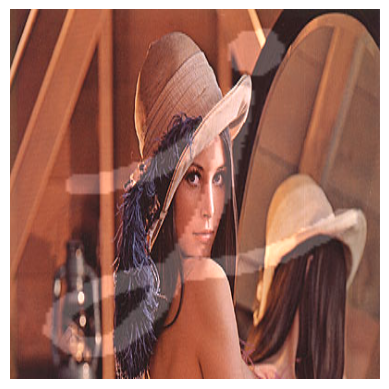

In [7]:
#Overlaying images - adding an image to another image

img1_bgr = cv2.imread('images/lena.jpg')
img2_bgr = cv2.imread('images/j.png')

img1_rgb = cv2.cvtColor(img1_bgr, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2_bgr, cv2.COLOR_BGR2RGB)

resized1 = cv2.resize(img1_rgb, (400, 400))
resized2 = cv2.resize(img2_rgb, (400, 400))

overlay = cv2.addWeighted(resized1, 1, resized2, 0.2, 0)

plt.imshow(overlay)
plt.axis('off')
plt.show()


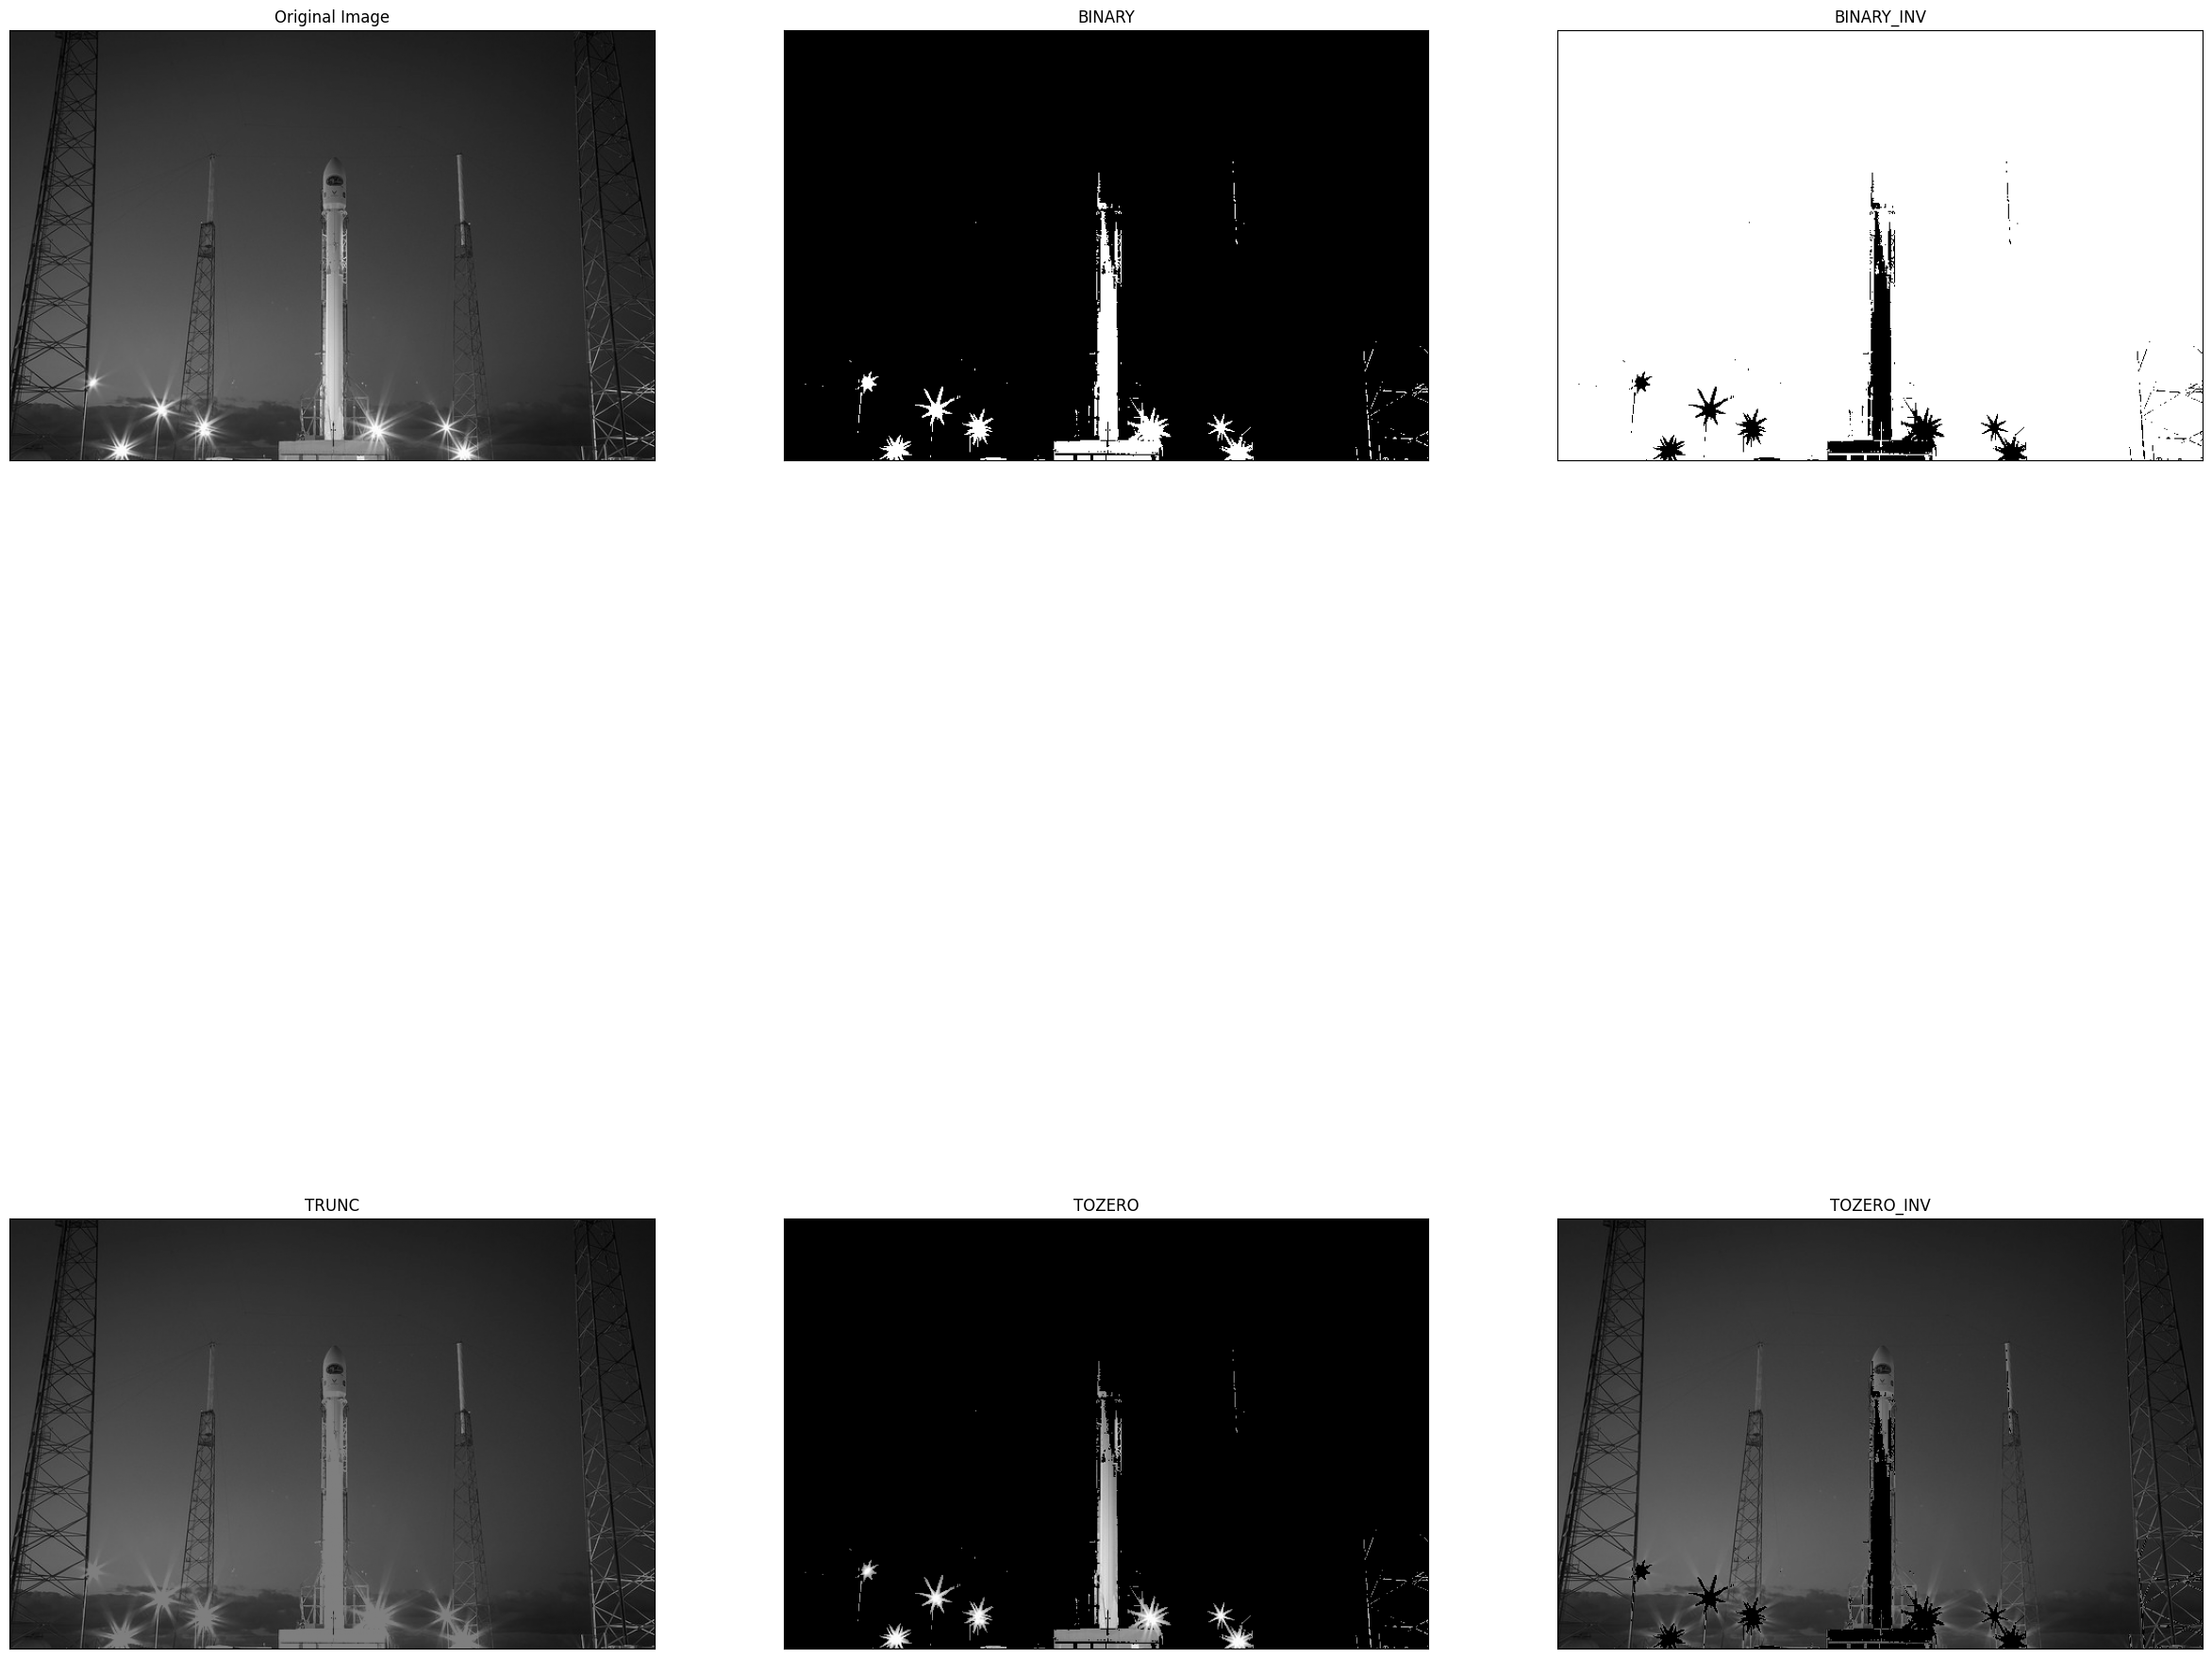

In [8]:
#Binary images - thresholding

img_bgr = cv2.imread('images/rocket.jpg')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
im_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

ret, thresh1 = cv2.threshold(im_gray, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(im_gray, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(im_gray, 127, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(im_gray, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(im_gray, 127, 255, cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [im_gray, thresh1, thresh2, thresh3, thresh4, thresh5]
 
plt.figure(figsize=(30,30)) 
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
 
plt.show()
#Important always have the objects white


In the previous section, we used one global value as a threshold. But this might not be good in all cases, e.g. if an image has different lighting conditions in different areas. In that case, adaptive thresholding can help. Here, the algorithm determines the threshold for a pixel based on a small region around it. So we get different thresholds for different regions of the same image which gives better results for images with varying illumination.
 
In addition to the parameters described above, the method cv.adaptiveThreshold takes three input parameters:
 
The adaptiveMethod decides how the threshold value is calculated:
 
cv.ADAPTIVE_THRESH_MEAN_C: The threshold value is the mean of the neighbourhood area minus the constant C.
cv.ADAPTIVE_THRESH_GAUSSIAN_C: The threshold value is a gaussian-weighted sum of the neighbourhood values minus the constant C.
The blockSize determines the size of the neighbourhood area and C is a constant that is subtracted from the mean or weighted sum of the neighbourhood pixels.

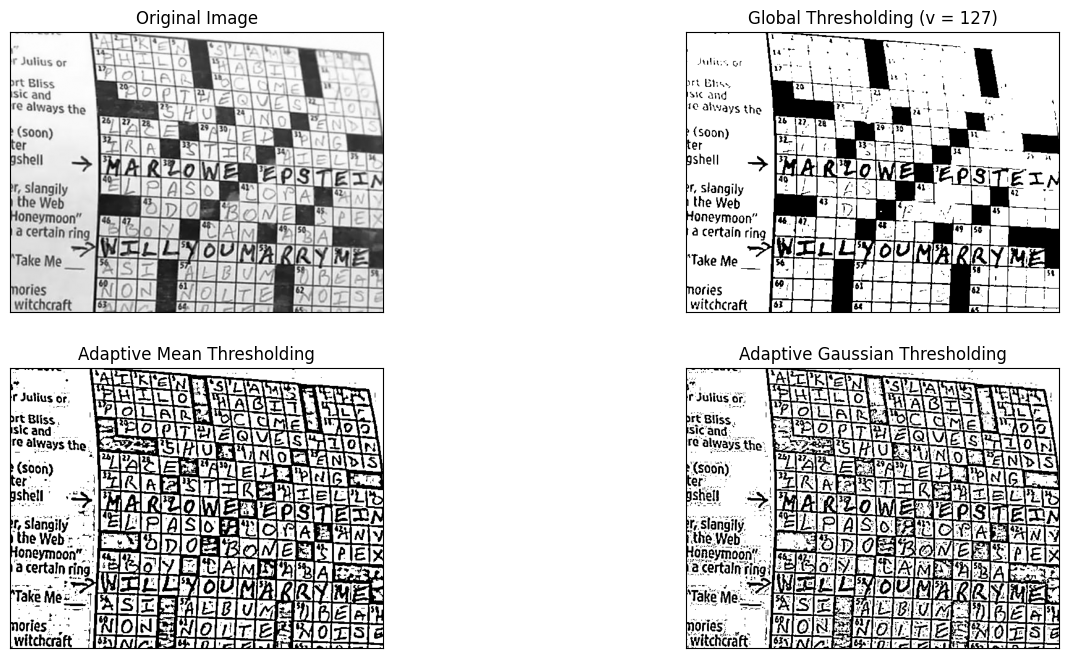

In [9]:
# ADAPTIVE THRESHOLDING

img = cv2.imread('images/creative-proposal.jpg', cv2.IMREAD_GRAYSCALE)
# img = cv2.imread('images/rocket.jpg', cv2.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
# img = cv2.medianBlur(img,5)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

plt.figure(figsize=(16,8))
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

<>:3: SyntaxWarning: invalid escape sequence '\o'
<>:3: SyntaxWarning: invalid escape sequence '\o'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_4648\2696559254.py:3: SyntaxWarning: invalid escape sequence '\o'
  img_bgr = cv2.imread('images\objects.png')


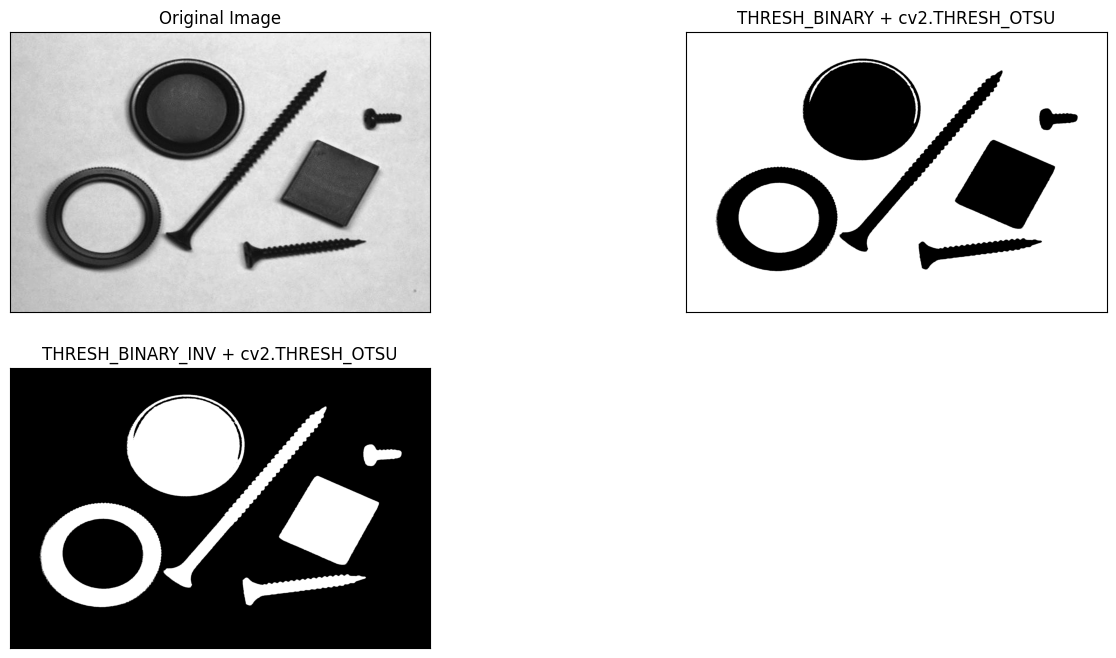

In [10]:
# Otsu thresholding

img_bgr = cv2.imread('images\objects.png')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
im_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
ret, thresh_otsu1 = cv2.threshold(im_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
ret, thresh_otsu2 = cv2.threshold(im_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

titles = ['Original Image', 'THRESH_BINARY + cv2.THRESH_OTSU',
            'THRESH_BINARY_INV + cv2.THRESH_OTSU']
images = [im_gray, thresh_otsu1, thresh_otsu2]

plt.figure(figsize=(16,8))
for i in range(3):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

# Morphology

<>:1: SyntaxWarning: invalid escape sequence '\o'
<>:1: SyntaxWarning: invalid escape sequence '\o'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_4648\234566936.py:1: SyntaxWarning: invalid escape sequence '\o'
  img_bgr = cv2.imread('images\objects.png')


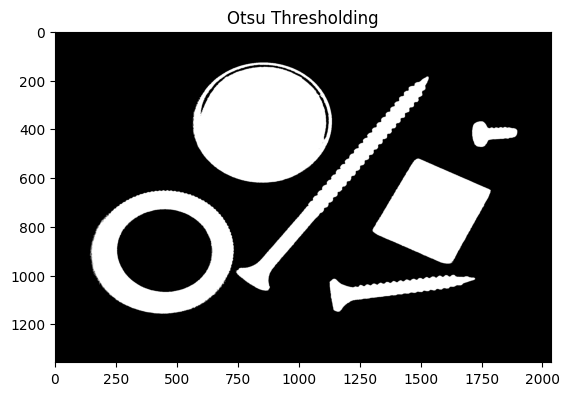

[[1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1]]


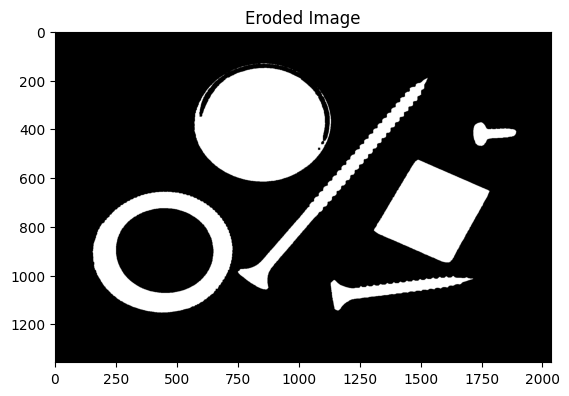

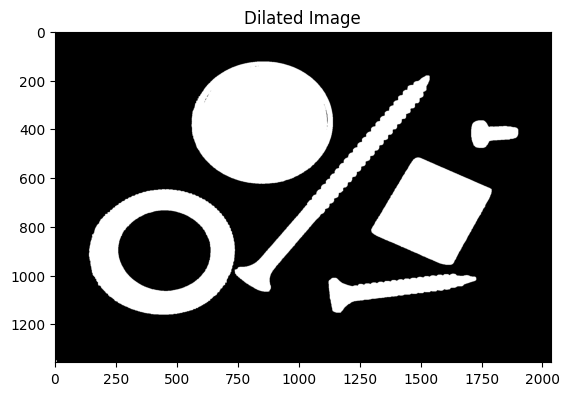

In [15]:
img_bgr = cv2.imread('images\objects.png')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
im_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
ret, thresh = cv2.threshold(im_gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.imshow(thresh, 'gray')
plt.title('Otsu Thresholding')
plt.show()
SE = np.ones((9,9), np.uint8)
print(SE)

erosion = cv2.erode(thresh, SE, iterations=1)
plt.imshow(erosion, 'gray')
plt.title('Eroded Image')
plt.show()

dilation = cv2.dilate(thresh, SE, iterations=1)
plt.imshow(dilation, 'gray')
plt.title('Dilated Image')
plt.show()

Note that dilation opertion above has removed the 'hole artifact' inside the disc object, but now the objects are sigificanly larger.
hence in morphology we frequently follow dilation operation by doing an erosion to restore bact to the original

Dilation -> Ersoision is called morphological closing, useful to reomove artifacts from inside objects

Erosion -> Dilation is called morphological opening, uswful to remove unwantes small artifacts outside

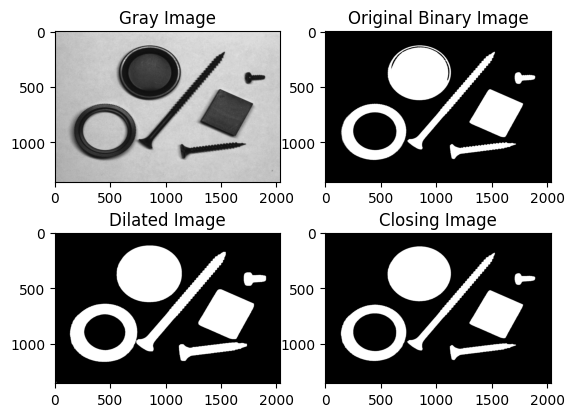

In [21]:
imgBGR = cv2.imread('images/objects.png')
imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)

imgGrey = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(imgGrey, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

plt.subplot(2,2,1)
plt.imshow(imgGrey, cmap="gray", vmin=0, vmax=255)
plt.title('Gray Image')

plt.subplot(2,2,2)
plt.imshow(thresh, cmap="gray", vmin=0, vmax=255)
plt.title('Original Binary Image')

SE  = np.ones((9,9), np.uint8)

dilation = cv2.dilate(thresh, SE, iterations=2)
plt.subplot(2,2,3)
plt.imshow(dilation, cmap="grey", vmin=0, vmax=255)
plt.title('Dilated Image')

plt.subplot(2,2,4)
closing = cv2.erode(dilation, SE, iterations=2)
plt.imshow(closing, cmap="grey", vmin=0, vmax=255)
plt.title('Closing Image')
plt.show()

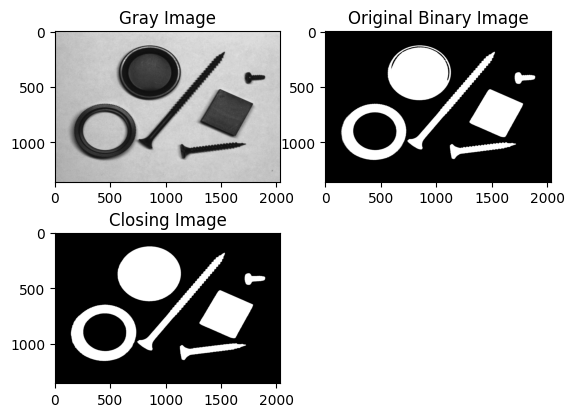

In [22]:

imgBGR = cv2.imread('images/objects.png')
imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)

imgGrey = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(imgGrey, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

plt.subplot(2,2,1)
plt.imshow(imgGrey, cmap="gray", vmin=0, vmax=255)
plt.title('Gray Image')

plt.subplot(2,2,2)
plt.imshow(thresh, cmap="gray", vmin=0, vmax=255)
plt.title('Original Binary Image')

SE  = np.ones((9,9), np.uint8)


plt.subplot(2,2,3)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, SE, iterations=2)
plt.imshow(closing, cmap="grey", vmin=0, vmax=255)
plt.title('Closing Image')
plt.show()

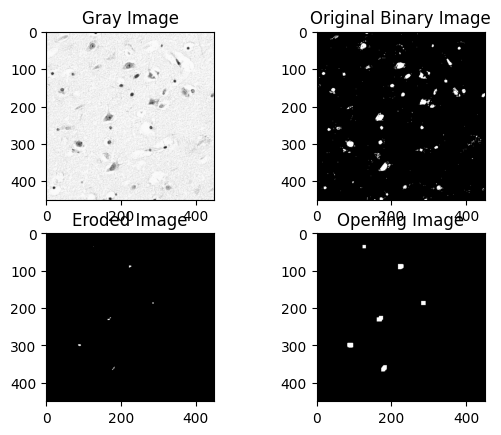

In [27]:
# example of morphological closing
imgBGR = cv2.imread('images/cells.jpg')
imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)

imgGrey = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(imgGrey, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

plt.subplot(2,2,1)
plt.imshow(imgGrey, cmap="gray", vmin=0, vmax=255)
plt.title('Gray Image')

plt.subplot(2,2,2)
plt.imshow(thresh, cmap="gray", vmin=0, vmax=255)
plt.title('Original Binary Image')

SE  = np.ones((9,9), np.uint8)

erosion = cv2.erode(thresh, SE, iterations=1)
plt.subplot(2,2,3)
plt.imshow(erosion, cmap="grey", vmin=0, vmax=255)
plt.title('Eroded Image')

plt.subplot(2,2,4)
opening = cv2.dilate(erosion, SE, iterations=1)
plt.imshow(opening, cmap="grey", vmin=0, vmax=255)
plt.title('Opening Image')
plt.show()